## Import libraries and define variables

In [1]:
import os
import pandas as pd 
import numpy as np

pd.set_option('display.max_colwidth', None)
from src.utils import load_dataset

DATA_DIR = "data"

RAW_PREPROC_DATA = os.path.join(DATA_DIR, "labels_racism_preproc.csv")
AGGREGATED_DATA = os.path.join(DATA_DIR, "labels_racism_aggregated.csv")
COL_X, COL_Y = "message", "label"

RANDOM_STATE = 1

## Loading dataset

In [2]:
raw = load_dataset(RAW_PREPROC_DATA)

print(f"Sample size: {raw.shape}")
raw.head()

Sample size: (9291, 5)


,id,message,labeller_id,label,ind_value
0,1,"🔴 Un grupo de inmigrantes de botellón y sin mascarilla hacen caso omiso de las indicaciones de la policía local en Badiá del Vallés, que intentaba desalojarlos. CasosAislados",1,non-racist,0.0
1,2,Recopilamos las principales noticias sobre brotes por #Covid_19 en España. Abrimos hilo 👇,1,non-racist,0.0
2,3,Esto debería leerlo todo Ecuador. Es el mayor escándalo de imparcialidad de un comité electoral que vi. La elección de las 5 personas por el CNE tienen un sesgo anticorreista y de relaciones con medios y fundaciones financiadas desde EEUU terrible. #LasEleccionesVanPorqueVan,1,non-racist,0.0
3,4,Más de 300 inmigrantes intentan saltar la valla de Melilla y dejan a tres guardias civiles heridos,1,non-racist,0.0
4,5,Aena invierte más de 31 millones de euros en el control sanitario de pasajeros. En @transparentia_ te lo explicamos 👇🏼,1,non-racist,0.0


In [3]:
aggregated = load_dataset(AGGREGATED_DATA)

print(f"Sample size: {aggregated.shape}")

aggregated.head()

Sample size: (5672, 10)


,id,message,labeller_id,label,ind_value,n_annotations,m_vote,m_vote_label,w_m_vote,w_m_vote_label
0,1,"🔴 Un grupo de inmigrantes de botellón y sin mascarilla hacen caso omiso de las indicaciones de la policía local en Badiá del Vallés, que intentaba desalojarlos. CasosAislados","[1, 1, 2, 3, 5, 6, 9]","[non-racist, racist, racist, racist, non-racist, racist, racist]","[0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0]",7,0.714286,racist,0.702597,racist
1,2,Recopilamos las principales noticias sobre brotes por #Covid_19 en España. Abrimos hilo 👇,"[1, 2, 3, 6, 9]","[non-racist, non-racist, non-racist, non-racist, non-racist]","[0.0, 0.0, 0.0, 0.0, 0.0]",5,0.000000,non-racist,0.081818,non-racist
2,3,Esto debería leerlo todo Ecuador. Es el mayor escándalo de imparcialidad de un comité electoral que vi. La elección de las 5 personas por el CNE tienen un sesgo anticorreista y de relaciones con medios y fundaciones financiadas desde EEUU terrible. #LasEleccionesVanPorqueVan,"[1, 2, 3, 6, 9]","[non-racist, non-racist, non-racist, non-racist, non-racist]","[0.0, 0.0, 0.0, 0.0, 0.0]",5,0.000000,non-racist,0.081818,non-racist
3,4,Más de 300 inmigrantes intentan saltar la valla de Melilla y dejan a tres guardias civiles heridos,"[1, 2, 3, 6, 8, 9]","[non-racist, non-racist, unknown, non-racist, non-racist, non-racist]","[0.0, 0.0, 0.5, 0.0, 0.0, 0.0]",6,0.083333,non-racist,0.139015,non-racist
4,5,Aena invierte más de 31 millones de euros en el control sanitario de pasajeros. En @transparentia_ te lo explicamos 👇🏼,"[1, 2, 3, 6, 9]","[non-racist, non-racist, non-racist, non-racist, non-racist]","[0.0, 0.0, 0.0, 0.0, 0.0]",5,0.000000,non-racist,0.081818,non-racist


## Annotation assessment

### Data exploration

1     344
2     393
3     145
4     400
5     400
6     400
7     400
8     604
9     491
10    809
11    780
12    482
13    137
14    492
15    493
16     64
17    486
18    125
19    963
20    294
21    295
22    294
Name: labeller_id, dtype: int64


<AxesSubplot:>

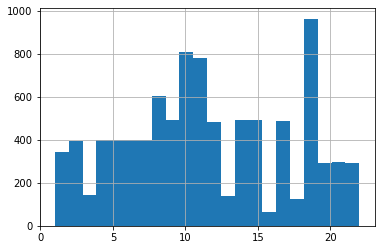

In [4]:
# Explore labellers: how many messages annotates each?
annotator_counts = raw.labeller_id.value_counts().sort_index()
print(annotator_counts)
raw.labeller_id.hist(bins=annotator_counts.index[-1])

In [5]:
# Explore labels: what are the possible labels? 
labels = raw.label.unique()
print(f"Unique labels: {labels}")

raw.label.value_counts()

Unique labels: ['non-racist' 'racist' 'unknown']


non-racist    4641
racist        4229
unknown        421
Name: label, dtype: int64

In [6]:
# In a non-strict classifier: racist is >= 0.5
aggregated.m_vote_label.value_counts()

racist        2962
non-racist    2710
Name: m_vote_label, dtype: int64

In [7]:
# TODO: 2

# How many messages where annotated by same person with differnt labels?


# ... create df with text and labellers id, and labels
discrepancies = raw.groupby(["id", "labeller_id"])["label"].unique()
discrepancies = discrepancies.reset_index()
print(discrepancies.columns)
discrepancies.head(20)

Index(['id', 'labeller_id', 'label'], dtype='object')


,id,labeller_id,label
0,1,1,"[non-racist, racist]"
1,1,2,[racist]
2,1,3,[racist]
3,1,5,[non-racist]
4,1,6,[racist]
5,1,9,[racist]
6,2,1,[non-racist]
7,2,2,[non-racist]
8,2,3,[non-racist]
9,2,6,[non-racist]


In [8]:
def check_diff(list):
    is_diff=None
    if ('racist' in list and 'non-racist' in list) \
        or ('racist' in list and 'unknown' in list) \
        or ('non-racist' in list and 'unknown' in list):
        is_diff=True
    else:
        is_diff=False
    return is_diff
        
discrepancies["is_diff"] = discrepancies["label"].apply(lambda label_l: check_diff(label_l))

# Create df of differences and get texts with the id
discrepancies = discrepancies.loc[discrepancies["is_diff"]==True,]
discrepancies = pd.merge(discrepancies, aggregated[["id","message"]],how="left", on="id")

print("There are {} discrepancies".format(discrepancies.shape[0]))
# aggregated.loc[aggregated.id.isin(discrepancies_true.id),["id", "message", "labeller_id", "label"]]
discrepancies

There are 30 discrepancies


,id,labeller_id,label,is_diff,message
0,1,1,"[non-racist, racist]",True,"🔴 Un grupo de inmigrantes de botellón y sin mascarilla hacen caso omiso de las indicaciones de la policía local en Badiá del Vallés, que intentaba desalojarlos. CasosAislados"
1,10,9,"[non-racist, racist]",True,Las mafias celebran el efecto llamada de la izquierda y amplían su negocio al traslado de inmigrantes
2,12,9,"[non-racist, racist]",True,Así se fugaron tras llegar en patera los 35 inmigrantes que busca la Policía en Cádiz
3,15,2,"[unknown, non-racist]",True,El efecto llamada de Sánchez: las costas de Canarias reciben una media de 147 menas al mes
4,18,2,"[unknown, non-racist]",True,Presión extrema de Sánchez a Andalucía: la comunidad soporta un 40% de los menas acogidos en España
5,35,2,"[racist, non-racist]",True,"Gobierno gasta 9 millones en 130 todoterrenos para la Policía de Marruecos y se olvida de la #EquiparacionYa de nuestros agentes. Se arman hasta las trancas con nuestro dinero mientras nos invaden, saquean y cotizamos para darles un subsidio a sus menas."
6,42,2,"[unknown, racist]",True,George Soros dona 220 millones de dólares a las organizaciones de negros
7,43,9,"[non-racist, racist]",True,"El Gobierno destapa la mentira de Marlaska: ""Los traslados de inmigrantes son verificados por Interior"""
8,46,2,"[unknown, racist]",True,💸 Más de 26 millones de los impuestos de los españoles destinados al recibimiento y trato de inmigrantes ilegales. Se ayuda y subvenciona a las ONG que colaboran con las mafias mientras se abandona a la Policía y a la Guardia Civil. 📢 #MotivosParaLaMoción
9,47,2,"[unknown, non-racist]",True,🔴Asesinada una niña de 8 años en Pakistán por dejar escapar unos loros de la familia para la que trabajaba como empleada doméstica. ¡Wellcome to Europa!


In [9]:
# example:
aggregated.loc[aggregated.id==47,]

,id,message,labeller_id,label,ind_value,n_annotations,m_vote,m_vote_label,w_m_vote,w_m_vote_label
46,47,🔴Asesinada una niña de 8 años en Pakistán por dejar escapar unos loros de la familia para la que trabajaba como empleada doméstica. ¡Wellcome to Europa!,"[1, 2, 2, 3, 4, 6, 8, 9, 9]","[non-racist, unknown, non-racist, racist, non-racist, racist, racist, non-racist, racist]","[0.0, 0.5, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0]",9,0.5,racist,0.452273,racist


### Number of annotations: the number of annotations (unique messages)

In [12]:
# Create n annotators column
if 'n_annotators' not in aggregated.columns:    
    aggregated.insert(5, 'n_annotators', aggregated["labeller_id"].apply(lambda labeller_l: len(set(labeller_l))))


# Racist messages


racist = {'nonstrict':aggregated.loc[aggregated.m_vote_label == "racist"], 'strict': aggregated.loc[aggregated.m_vote > 0.5]}
nonracist = {'nonstrict':aggregated.loc[aggregated.m_vote_label == "non-racist"], 'strict': aggregated.loc[aggregated.m_vote <= 0.5]}

def print_counts(df, col):
    # get counts series
    counts = df[col].value_counts().sort_index()
    print("Counts: \n {} \n\n".format(counts))
    # percentage
    perc = counts/counts.sum()

    print(perc)
    return perc

print("Percentage of annotations of racist:")
racist_perc = print_counts(racist['nonstrict'], "n_annotations")
print("Over 5 (i.e. {}): {}".format(racist_perc[5:].index, racist_perc[5:].sum()))

Percentage of annotations of racist:
Counts: 
 1    1758
2     816
3     222
4      98
5      32
6      15
7      15
8       3
9       3
Name: n_annotations, dtype: int64 


1    0.593518
2    0.275490
3    0.074949
4    0.033086
5    0.010804
6    0.005064
7    0.005064
8    0.001013
9    0.001013
Name: n_annotations, dtype: float64
Over 5 (i.e. Int64Index([6, 7, 8, 9], dtype='int64')): 0.012153950033760972


In [13]:
# Non-racist
print("Percentage of annotations for non racist")
nonracist_perc = print_counts(nonracist['nonstrict'], "n_annotations")
print("Over 5 (i.e. {}): {}".format(nonracist_perc[5:].index, nonracist_perc[5:].sum()))

Percentage of annotations for non racist
Counts: 
 1     1607
2      803
3      147
4       46
5       71
6       20
7        8
8        6
9        1
11       1
Name: n_annotations, dtype: int64 


1     0.592989
2     0.296310
3     0.054244
4     0.016974
5     0.026199
6     0.007380
7     0.002952
8     0.002214
9     0.000369
11    0.000369
Name: n_annotations, dtype: float64
Over 5 (i.e. Int64Index([6, 7, 8, 9, 11], dtype='int64')): 0.013284132841328412


### Annotator agreement

In [14]:
racist['nonstrict'].head()

,id,message,labeller_id,label,ind_value,n_annotators,n_annotations,m_vote,m_vote_label,w_m_vote,w_m_vote_label
0,1,"🔴 Un grupo de inmigrantes de botellón y sin mascarilla hacen caso omiso de las indicaciones de la policía local en Badiá del Vallés, que intentaba desalojarlos. CasosAislados","[1, 1, 2, 3, 5, 6, 9]","[non-racist, racist, racist, racist, non-racist, racist, racist]","[0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0]",6,7,0.714286,racist,0.702597,racist
5,6,"¿Cinco ex menas, @elmundoes? Cinco inmigrantes ilegales que merecen ser expulsados y cumplir pena en sus países. Los políticos progres de todos los partidos han destrozado nuestros barrios con sus experimentos multiculturales. ¡Pongamos Ley y Orden!","[1, 2, 3, 5, 6, 9]","[racist, racist, racist, racist, racist, racist]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",6,6,1.000000,racist,0.931818,racist
6,7,🔴El número de inmigrantes que llega a las islas crece un 520% en lo que va de año. Dale a esto 10 años más.,"[1, 2, 3, 6, 8, 9]","[non-racist, racist, racist, racist, racist, racist]","[0.0, 1.0, 1.0, 1.0, 1.0, 1.0]",6,6,0.833333,racist,0.790152,racist
8,9,Detenidos cuatro menas por la brutal paliza a un joven en el distrito madrileño de San Blas,"[1, 2, 3, 6, 7, 8, 9]","[racist, racist, racist, racist, racist, racist, racist]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",7,7,1.000000,racist,0.945455,racist
12,13,"🛑 Menores inmigrantes asaltan fincas y viviendas en El Salobre en San Bartolomé de Tirajana, Gran Canaria. Los canarios ya tienen su Lampedusa.","[1, 2, 3, 5, 6, 9, 10]","[racist, racist, racist, racist, racist, racist, racist]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",7,7,1.000000,racist,0.945455,racist


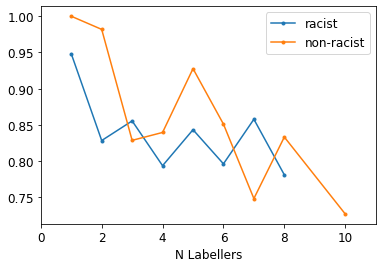

In [15]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

fig = plt.figure()
# Plot the mean value of majority votes on increasing annotator number
plt.plot(racist['nonstrict'].groupby("n_annotators")["m_vote"].mean(), label="racist", marker='.')
plt.plot(1.0-nonracist['nonstrict'].groupby("n_annotators")["m_vote"].mean(), label='non-racist', marker='.')

plt.legend()
plt.xlim(0,11)
plt.xlabel("N Labellers")
fig.savefig('plots/agreement_annotators_nonstrict.png')


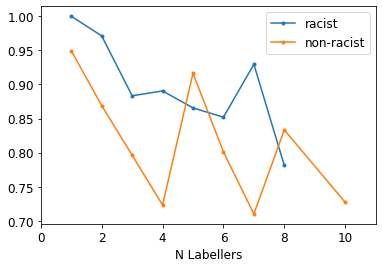

In [16]:

fig = plt.figure()
# Plot the mean value of majority votes on increasing annotator number
plt.plot(racist['strict'].groupby("n_annotators")["m_vote"].mean(), label="racist", marker='.')
plt.plot(1.0-nonracist['strict'].groupby("n_annotators")["m_vote"].mean(), label='non-racist', marker='.')

plt.legend()#fontsize='x-large')
plt.xlim(0,11)
# plt.title()
plt.xlabel("N Labellers")#, fontsize='large')
fig.savefig('plots/agreement_annotators_strict.png')